In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
con_df = pd.read_excel('Concrete_Data.xls')
con_df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
con_df.columns.values

array(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '], dtype=object)

In [4]:
## Component 1: Cement (kg in a m^3 mixture)
## Component 2: Blast Furnace Slag (kg in a m^3 mixture)
## Component 3: Fly Ash (kg in a m^3 mixture)
## Component 4: Water(kg in a m^3 mixture)
## Component 5: Superplasticizer (kg in a m^3 mixture)
## Component 6: Coarse Aggregate(kg in a m^3 mixture)
## Component 7: Fine Aggregate(kg in a m^3 mixture)
## Component 8: Age (day)
## Component 9: Concrete compressive strength(MPa, megapascals)
columns= ['Cement',
       'Blast_furnace_slag',
       'Fly_ash',
       'Water',
       'Superplasticizer',
       'Coarse Aggregate',
       'Fine Aggregate', 'Age_in_day',
       'Concrete_comp_sth']

In [5]:
con_df = con_df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement',
                       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_furnace_slag',
                       'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_ash', 
                       'Water  (component 4)(kg in a m^3 mixture)':'Water', 
                       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Super_plasticizer',
                       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_Aggregate',
                       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate', 
                       'Age (day)':'Age_in_day',
                       'Concrete compressive strength(MPa, megapascals) ':'Concrete_comp_sth'})
con_df.head()

,Cement,Blast_furnace_slag,Fly_ash,Water,Super_plasticizer,Coarse_Aggregate,Fine_Aggregate,Age_in_day,Concrete_comp_sth
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
clean_df = con_df.copy()

In [7]:
Concrete_comp_sth = clean_df.groupby(['Concrete_comp_sth']).mean()
Concrete_comp_sth.tail(10)

,Cement,Blast_furnace_slag,Fly_ash,Water,Super_plasticizer,Coarse_Aggregate,Fine_Aggregate,Age_in_day
Concrete_comp_sth,,,,,,,,
76.235361,275.0,180.0,120.0,162.0,10.35,830.0,765.0,28.0
76.800732,286.3,200.9,0.0,144.7,11.20,1004.6,803.7,91.0
77.297154,362.6,189.0,0.0,164.9,11.60,944.7,755.8,56.0
78.800212,451.0,0.0,0.0,165.0,11.25,1030.0,745.0,28.0
79.296635,362.6,189.0,0.0,164.9,11.60,944.7,755.8,91.0
79.400056,389.9,189.0,0.0,145.9,22.00,944.7,755.8,56.0
79.986111,540.0,0.0,0.0,162.0,2.50,1040.0,676.0,28.0
80.199848,323.7,282.8,0.0,183.8,10.30,942.7,659.9,56.0
81.751169,315.0,137.0,0.0,145.0,5.90,1130.0,745.0,28.0


In [8]:
Age_in_day = clean_df.groupby(['Age_in_day']).mean()
Age_in_day

,Cement,Blast_furnace_slag,Fly_ash,Water,Super_plasticizer,Coarse_Aggregate,Fine_Aggregate,Concrete_comp_sth
Age_in_day,,,,,,,,
1,442.500000,0.000000,0.000000,193.000000,0.000000,1045.500000,688.000000,9.452716
3,286.577910,65.977090,57.162313,176.187388,6.614754,977.247239,796.109478,18.981082
7,312.923810,92.943651,12.642857,183.287302,3.751667,983.814286,768.103175,26.050623
14,246.174839,18.589194,97.850806,173.387258,6.672048,1023.908548,800.114032,28.751038
28,265.443388,86.285012,62.794706,183.059082,6.994605,956.059129,764.376635,36.748480
56,294.168571,55.221209,85.041209,167.446264,9.853593,979.634396,798.487582,51.890061
90,284.140741,88.524074,0.000000,200.768519,0.000000,966.137037,758.662963,40.480809
91,392.263636,148.809091,0.000000,157.763636,15.154545,918.940909,802.336364,69.806938
100,220.900769,22.164038,116.668269,169.442500,7.955135,1025.294808,809.443654,47.668780


In [9]:
age_plus_con = Age_in_day.iloc[:,-1:]
age_plus_con.head()

,Concrete_comp_sth
Age_in_day,
1,9.452716
3,18.981082
7,26.050623
14,28.751038
28,36.748480


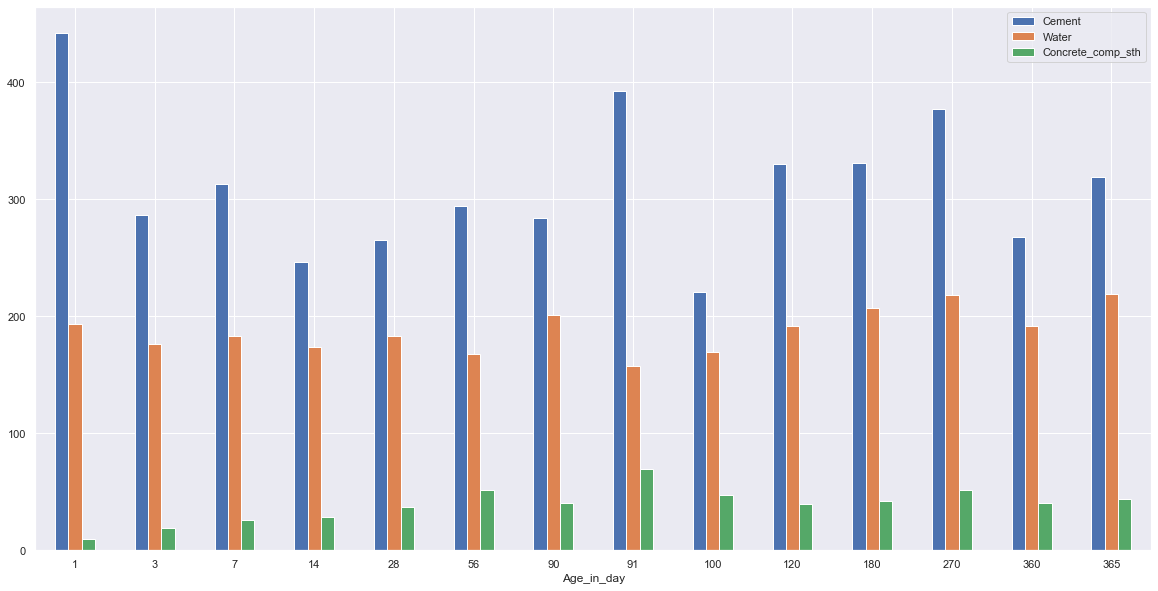

In [10]:
Age_in_day.plot.bar(y=(['Cement','Water','Concrete_comp_sth']), rot = 0,figsize=(20, 10))

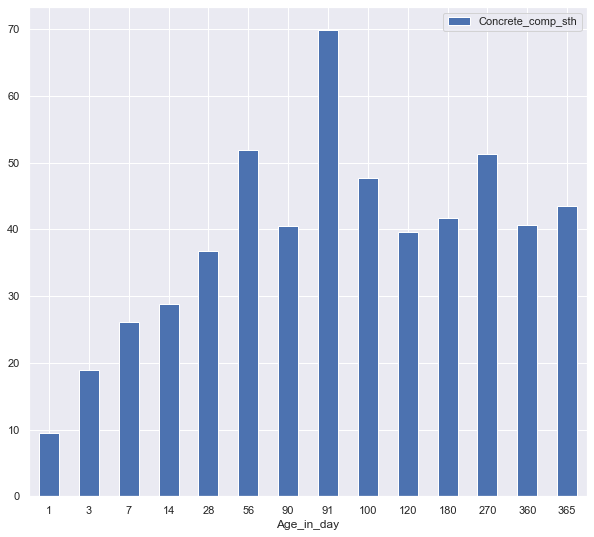

In [11]:
age_plus_con.plot.bar(y=(['Concrete_comp_sth']), rot = 0,figsize=(10, 9))

In [12]:
clean_df.corr()

,Cement,Blast_furnace_slag,Fly_ash,Water,Super_plasticizer,Coarse_Aggregate,Fine_Aggregate,Age_in_day,Concrete_comp_sth
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast_furnace_slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly_ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Super_plasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse_Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine_Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age_in_day,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Concrete_comp_sth,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


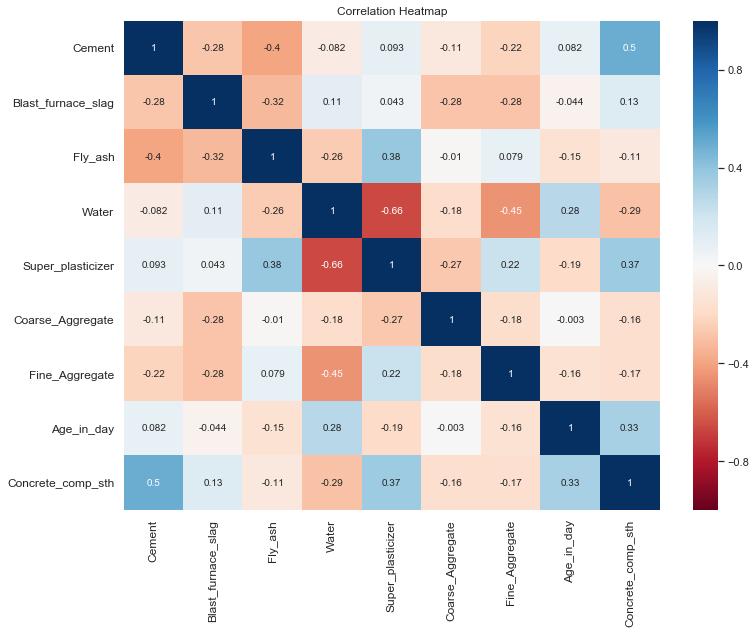

In [13]:
plt.figure(figsize = (12,9))
s = sns.heatmap(clean_df.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

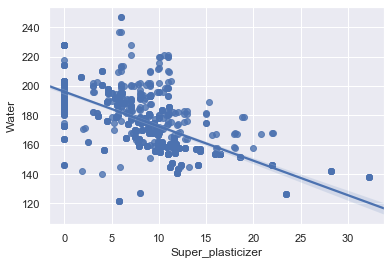

In [14]:
sns.regplot(x = clean_df['Super_plasticizer'],y = clean_df['Water'], fit_reg = True)

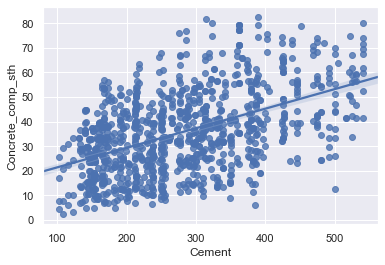

In [15]:
sns.regplot(x = clean_df['Cement'],y = clean_df['Concrete_comp_sth'], fit_reg = True)

In [16]:
clean_df.head()

,Cement,Blast_furnace_slag,Fly_ash,Water,Super_plasticizer,Coarse_Aggregate,Fine_Aggregate,Age_in_day,Concrete_comp_sth
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [17]:
clean_df.describe()

,Cement,Blast_furnace_slag,Fly_ash,Water,Super_plasticizer,Coarse_Aggregate,Fine_Aggregate,Age_in_day,Concrete_comp_sth
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [18]:
features = clean_df.iloc[:,:-1]

In [19]:
target = clean_df.iloc[:,-1:]

In [20]:
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

In [21]:
target = target.to_numpy()

In [22]:
target

array([[79.98611076],
       [61.88736576],
       [40.26953526],
       ...,
       [23.69660064],
       [32.76803638],
       [32.40123514]])

In [23]:
x_train,x_test,y_train,y_test = train_test_split(features, target, random_state = 42)

In [24]:
from sklearn.neural_network import MLPRegressor

In [25]:
regr = MLPRegressor(hidden_layer_sizes = 100, solver = 'lbfgs', random_state=42,max_iter = 1000)

In [26]:
regr.fit(x_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=100, learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [27]:
y_pred = regr.predict(x_test)

In [28]:
mean_absolute_error(y_test, y_pred)

4.439395449752189

In [29]:
new_y_pred = np.reshape(y_pred,(-1,1))

In [30]:
data = pd.DataFrame.from_records(new_y_pred)

In [31]:
data = data.rename(columns={'0': 'Y_pred'})

In [32]:
data.columns.values

array([0], dtype=int64)

In [33]:
columns = y_pred 

In [34]:
data.column = columns

In [35]:
data.head()

,0
0,49.578525
1,44.266693
2,80.105912
3,36.248267
4,8.766709


In [36]:
y_test = pd.DataFrame.from_records(y_test)
y_test.head()

,0
0,52.908320
1,55.895819
2,74.497882
3,35.301171
4,10.535193


In [37]:
nu = pd.concat([data,y_test], axis=1)

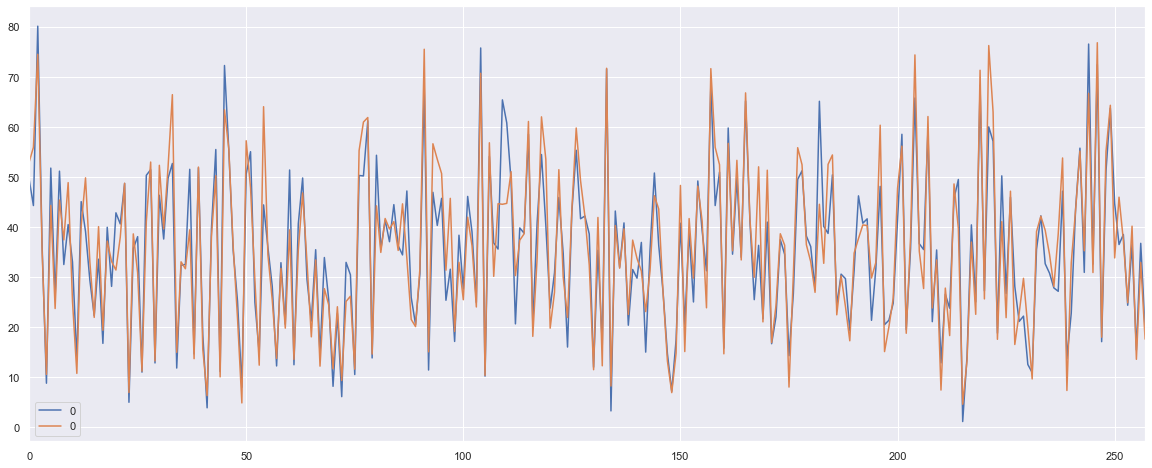

In [38]:
nu.plot(figsize=(20,8))

In [39]:
pickle.dump(regr, open ('regr.pickle', 'wb'))

In [40]:
pickle.dump(scaler, open ('scaler.pickle', 'wb'))